
# This notebook demonstrates the use different octahedron models to perform orientational averaging of the scattering intensity based on different quadrature methods.

## Three pure Python models: **`octa_general_fibonacci.py`**, **`octa_general_lebedev.py`**,**`octa_general_gauss.py`** and a Python + C model: **`octahedron_truncated.c`** (and .py) .
The pure Python models can be found in the folder "models_pure_python" and the Python + C model can be found in "models_with_c_code".

- You can copy theses files in the models folder of SasView, typically at:
    `C:\Users\Administrateur\AppData\Local\Programs\Python\Python310\Lib\site-packages\sasmodels\models`

- For use with the SASView GUI, place them in your user plugin folder:
    `C:\Users\Administrateur\.sasview\plugin_models`


*Nb: The `octa_general_fibonacci.py` method is the best compromise between accuracy and computational time. The `octa_general_lebedev.py` model has a higher computational time but is still acceptable. A Gauss-Legendre model also exists (`octa_general_gauss.py`), however, it has the highest computational time. We do not recommend using it (except for comparison purposes).*
    
## Installation for the three quadrature models
For the Fibonacci and Gauss-Legendre quadrature models, no additional libraries are required beyond standard Python and NumPy (included with SASView).

For the Lebedev quadrature model, you must install the `pyLebedev` library:

- Install using pip:  
    `pip install pylebedev`
- More information: https://pypi.org/project/pylebedev/

If you are using a global Python environment on Windows, the library should be located at:
`C:\Users\Administrateur\AppData\Local\Programs\Python\Python310\Lib\site-packages\pylebedev`

Copy the library to:
`C:\SasView-6.0.0\pylebedev` for use with SASView GUI.


## **1. Fitting on experimental data using the different octahedron models**
### Let's verify if all the models can be used to fit an experimental data

### Beginning of code

import all the packages
* need installation of sasmodels, sasdata, bumps in your python environnement

In [1]:

%matplotlib widget
import numpy as np
# import sasmodels
import sasmodels
import sasmodels.core
import sasmodels.bumps_model
from sasmodels.core import load_model
import sasmodels.data

import bumps
import bumps.fitters
import bumps.names
import bumps.fitproblem

import os
import matplotlib.pyplot as plt
import sys
path = "./models_pure_python"
sys.path.append(path)


from octa_general_fibonacci import *
from octa_general_gauss import *
from octa_general_lebedev import *

from octa_general_fibonacci import Iq as Iq_fibonacci
from octa_general_gauss import Iq as Iq_gauss_legendre
from octa_general_lebedev import Iq as Iq_lebedev

from octa_general_fibonacci import volume


### Load a 1D experimental data file

* 70.dat is a data set from gold octahedrons dilute suspension (Form Factor)
* load the data from an example .dat file into a numpy array
* transform the numpy array into a suitable 1D data set using `sasmodels.data.Data1D`
* possiblity to reduce the number of data points by slicing

1236
206


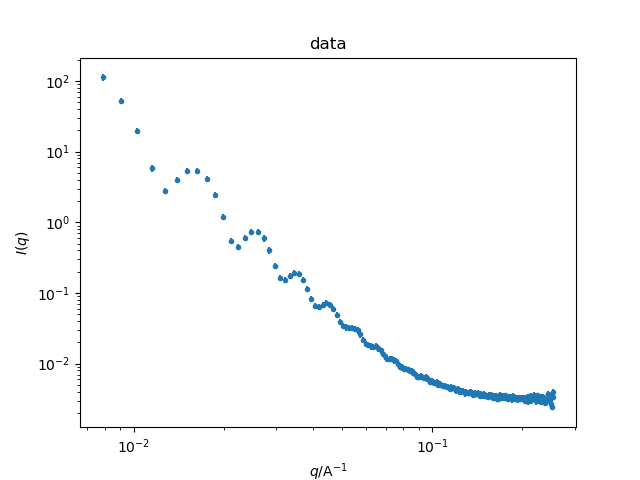

In [2]:
filename='./data-octa/70.dat' #data from octa paper 
data_np = np.loadtxt(filename, skiprows=40)

number_of_data=data_np.shape[0] #total number of data points in the file
print(number_of_data)

slicing_step=6 # step of slicing 

# new error bars: 10 % of intensity values
coeff=0.1
#data = sasmodels.data.Data1D(x=data_np[:,0], y=data_np[:,1], dy=data_np[:,2])
data = sasmodels.data.Data1D(x=data_np[0:number_of_data:slicing_step,0], 
                             y=data_np[0:number_of_data:slicing_step,1], 
                             dy=coeff*data_np[0:number_of_data:slicing_step,1])

number_of_data_new=data.x.shape[0]
print(number_of_data_new)

sasmodels.data.plot_data(data)

Save the data file after appyling slicing and modifying error bars

In [3]:
newfilename='./data-octa/70-new.dat'

with open(newfilename, "w") as f:
    f.write("raw data file is: 70.dat\n")
    f.write("number of data points: \t"+str(number_of_data_new)+"\n")

with open(newfilename, "a") as fa:
    for i in range(0,number_of_data_new):
        line_to_write=str(data.x[i])+"\t"+str(data.y[i])+"\t"+str(data.dy[i])+"\n"
        fa.write(line_to_write)


### 1.1 Use pure Python models 

### Fit with the model based on the Fibonacci quadrature

Execution time Fibonacci with 300.0 points: 0.0339 seconds
Execution time Fibonacci with 300.0 points: 0.0298 seconds
Execution time Fibonacci with 300.0 points: 0.0274 seconds
Execution time Fibonacci with 300.0 points: 0.0290 seconds
Execution time Fibonacci with 300.0 points: 0.0296 seconds
Execution time Fibonacci with 300.0 points: 0.0247 seconds
Execution time Fibonacci with 300.0 points: 0.0337 seconds
Execution time Fibonacci with 300.0 points: 0.0307 seconds
Execution time Fibonacci with 300.0 points: 0.0298 seconds
Execution time Fibonacci with 300.0 points: 0.0301 seconds


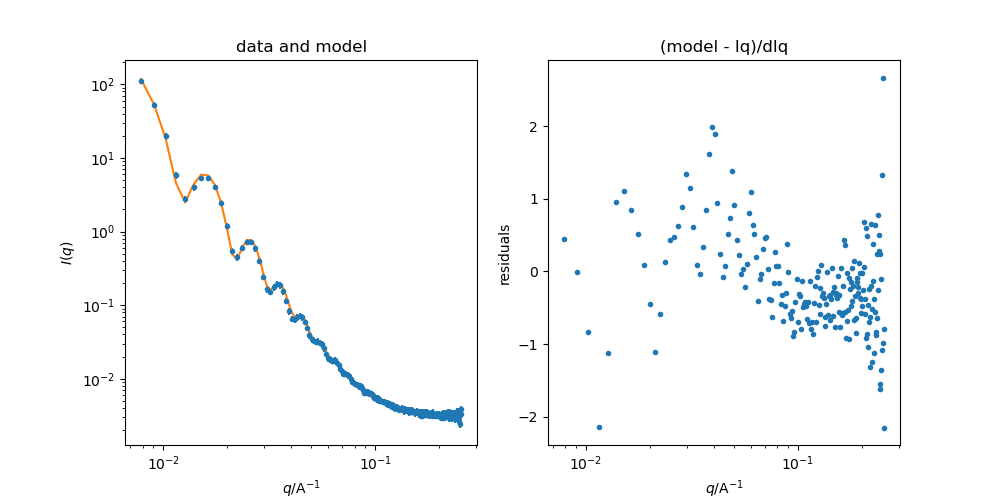

In [4]:
kernel = sasmodels.core.load_model("octa_general_fibonacci")
params = {
    "background": 0.003,
    "scale": 2.86e-6,
    "length_a": 538,
    "t":0.75,
    "npoints_fibonacci": 300, # around 400 points is usually enough
    "length_a_pd_type": 'gaussian', #type of polydispersity function
    "length_a_pd": 0.06, #polydispersity
    "length_a_pd_n": 10, #number of steps in polydispersity
    "length_a_pd_nsigma": 3, #range as multiple of sigma

}
modelfit = sasmodels.bumps_model.Model(kernel, **params)
experiment = sasmodels.bumps_model.Experiment(data=data, model=modelfit)

plt.figure(figsize=(10,5))
experiment.plot()

### Fit using the model based on the Lebedev quadrature

Execution time Lebedev with 974 points: 0.1376 seconds
Execution time Lebedev with 974 points: 0.1356 seconds
Execution time Lebedev with 974 points: 0.1371 seconds
Execution time Lebedev with 974 points: 0.1280 seconds
Execution time Lebedev with 974 points: 0.1312 seconds
Execution time Lebedev with 974 points: 0.1261 seconds
Execution time Lebedev with 974 points: 0.1307 seconds
Execution time Lebedev with 974 points: 0.1326 seconds
Execution time Lebedev with 974 points: 0.1284 seconds
Execution time Lebedev with 974 points: 0.1252 seconds


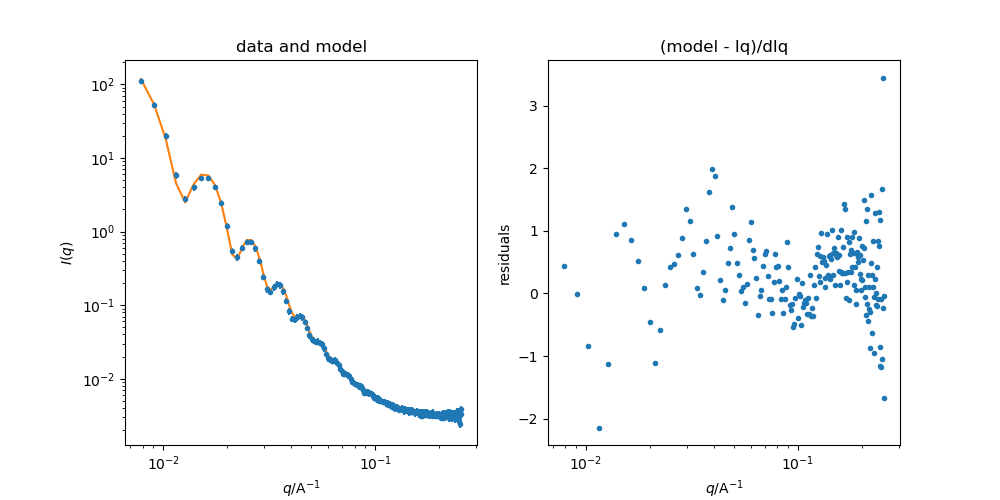

In [5]:
kernel = sasmodels.core.load_model("octa_general_lebedev")
params = {
    "background": 0.003,
    "scale": 2.86e-6,
    "length_a": 538,
    "t":0.75,
    "norder_index": 18, # index in the order list (order is 130)
    "length_a_pd_type": 'gaussian', #type of polydispersity function
    "length_a_pd": 0.06, #polydispersity
    "length_a_pd_n": 10, #number of steps in polydispersity
    "length_a_pd_nsigma": 3 #range as multiple of sigma
   
}
modelfit = sasmodels.bumps_model.Model(kernel, **params)
experiment = sasmodels.bumps_model.Experiment(data=data, model=modelfit)

plt.figure(figsize=(10,5))
experiment.plot()

### Fit with the model based on Gauss-Legendre quadrature (longer)


Execution time Gauss with 2500 points: 0.3122 seconds
Execution time Gauss with 2500 points: 0.2983 seconds
Execution time Gauss with 2500 points: 0.2889 seconds
Execution time Gauss with 2500 points: 0.2832 seconds
Execution time Gauss with 2500 points: 0.2920 seconds
Execution time Gauss with 2500 points: 0.2862 seconds
Execution time Gauss with 2500 points: 0.2715 seconds
Execution time Gauss with 2500 points: 0.2869 seconds
Execution time Gauss with 2500 points: 0.2862 seconds
Execution time Gauss with 2500 points: 0.2891 seconds


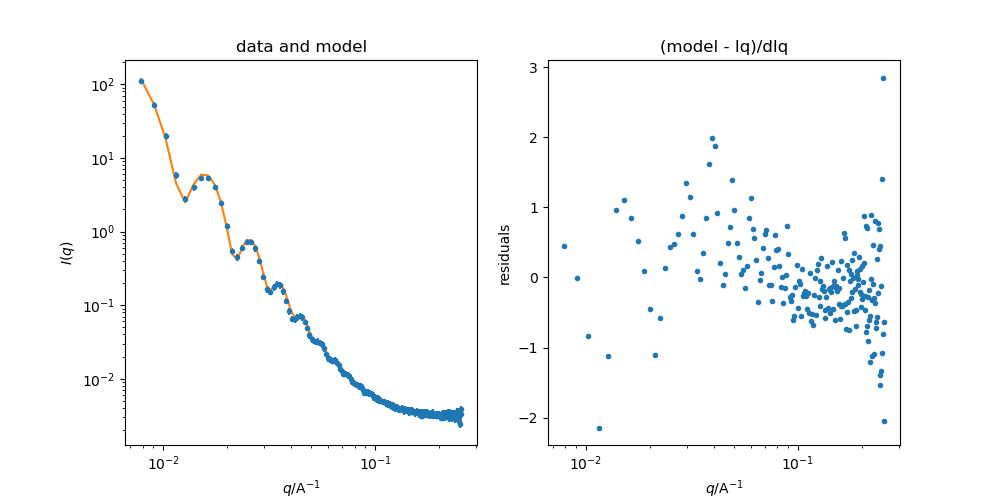

In [6]:
kernel = sasmodels.core.load_model("octa_general_gauss")
params = {
    "background": 0.003,
    "scale": 2.86e-6,
    "length_a": 538,
    "t":0.75,
    "npoints_gauss" : 50,
    "length_a_pd_type": 'gaussian', #type of polydispersity function
    "length_a_pd": 0.06, #polydispersity
    "length_a_pd_n": 10, #number of steps in polydispersity
    "length_a_pd_nsigma": 3 #range as multiple of sigma
   
}
modelfit = sasmodels.bumps_model.Model(kernel, **params)
experiment = sasmodels.bumps_model.Experiment(data=data, model=modelfit)

plt.figure(figsize=(10,5))
experiment.plot()

### 1.2 Use the Python + C model (based on Gauss)
Reminder : You need to copy the models `octahedron_truncated.C` and `octahedron_truncated.py` found in the folder `models_with_c_code` at:   `C:\Users\Administrateur\AppData\Local\Programs\Python\Python310\Lib\site-packages\sasmodels\models`

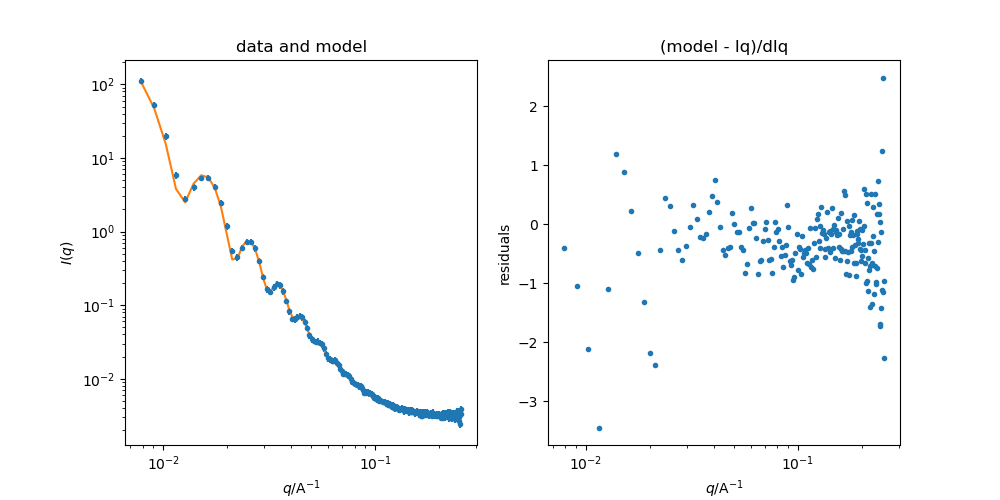

In [7]:
kernel = sasmodels.core.load_model("octahedron_truncated")
params = {
    "background": 0.003,
    "scale": 2.86e-6,
    "length_a": 538,
    "t":0.75,
    "length_a_pd_type": 'gaussian', #type of polydispersity function
    "length_a_pd": 0.06, #polydispersity
    "length_a_pd_n": 10, #number of steps in polydispersity
    "length_a_pd_nsigma": 3 #range as multiple of sigma
   
}
modelfit = sasmodels.bumps_model.Model(kernel, **params)
experiment = sasmodels.bumps_model.Experiment(data=data, model=modelfit)

plt.figure(figsize=(10,5))
experiment.plot()

## **2. Comparison of the different quadratures (no fitting on experimental data)**


In [8]:

# Define the parameters of the octahedron
length_a=500
b2a_ratio=1
c2a_ratio=1
t=0.99
sld=4e-6
sld_solvent=1e-6



V = volume(length_a, b2a_ratio, c2a_ratio, t) # data in angstrom, volume will be used for normalization later
print(V)


166666166.66666666


### 2.1. Find the amount of points necessary for intensity convergence for each quadrature (pure Python models)

#### Fibonacci 

Execution time Fibonacci with 100 points: 0.0126 seconds
Execution time Fibonacci with 200 points: 0.0288 seconds
Execution time Fibonacci with 300 points: 0.0350 seconds
Execution time Fibonacci with 400 points: 0.0503 seconds
Execution time Fibonacci with 500 points: 0.0936 seconds
Execution time Fibonacci with 600 points: 0.1021 seconds


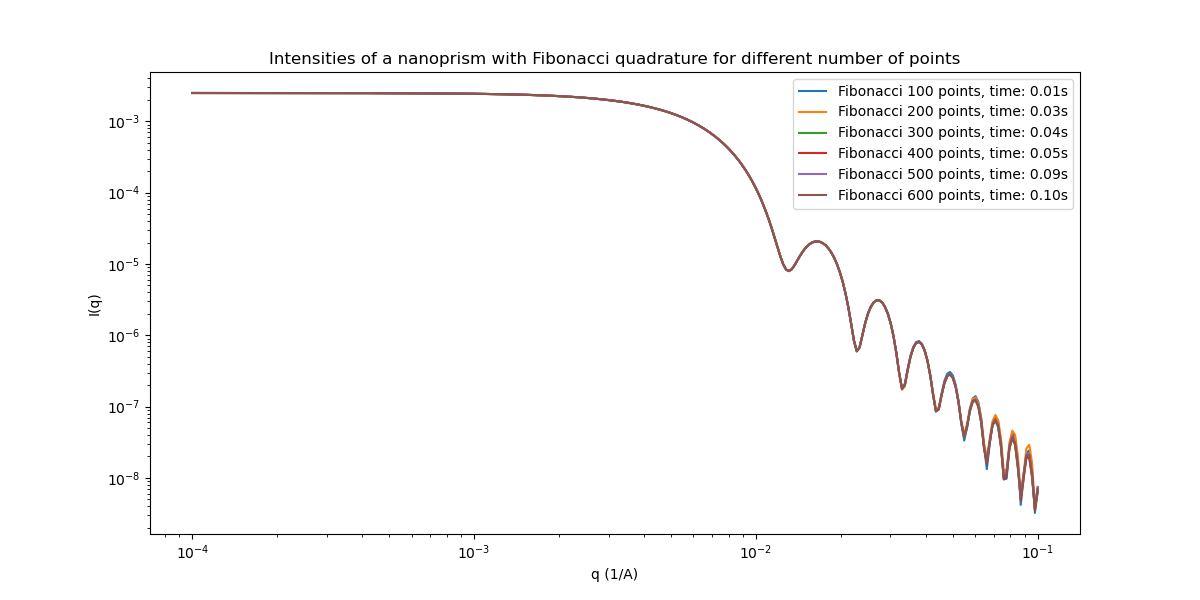

In [9]:
# apply the factor
from matplotlib import pyplot as plt

qs = np.logspace(-4,-1,300,base=10)

# Choose different number of points for fibonacci
npoints_fibonacci_1 = 100 
npoints_fibonacci_2 = 200
npoints_fibonacci_3 = 300
npoints_fibonacci_4 = 400
npoints_fibonacci_5 = 500
npoints_fibonacci_6 = 600


# Define Iq, computational time and the number of total points 
time_start = time.time()
I_q_fibonacci_1 = Iq_fibonacci(qs, sld, sld_solvent,length_a, b2a_ratio, c2a_ratio, t,  npoints_fibonacci_1)
time_fibonacci_1 = time.time() - time_start

time_start = time.time()
I_q_fibonacci_2 = Iq_fibonacci(qs, sld, sld_solvent,length_a, b2a_ratio, c2a_ratio, t,  npoints_fibonacci_2) 
time_fibonacci_2 = time.time() - time_start

time_start = time.time()
I_q_fibonacci_3 =  Iq_fibonacci(qs, sld, sld_solvent,length_a, b2a_ratio, c2a_ratio, t,  npoints_fibonacci_3)
time_fibonacci_3 = time.time() - time_start

time_start = time.time()
I_q_fibonacci_4 =  Iq_fibonacci(qs, sld, sld_solvent,length_a, b2a_ratio, c2a_ratio, t,  npoints_fibonacci_4)
time_fibonacci_4 = time.time() - time_start

time_start = time.time()
I_q_fibonacci_5 =  Iq_fibonacci(qs, sld, sld_solvent,length_a, b2a_ratio, c2a_ratio, t,  npoints_fibonacci_5)
time_fibonacci_5 = time.time() - time_start

time_start = time.time()
I_q_fibonacci_6 =  Iq_fibonacci(qs, sld, sld_solvent,length_a, b2a_ratio, c2a_ratio, t,  npoints_fibonacci_6)
time_fibonacci_6 = time.time() - time_start



# Plot the results

plt.figure(figsize=(12, 6))
plt.size=(10,10)

plt.loglog(qs,I_q_fibonacci_1*V*10**(-4), label=f'Fibonacci {npoints_fibonacci_1} points, time: {time_fibonacci_1:.2f}s' )
plt.loglog(qs,I_q_fibonacci_2*V*10**(-4), label=f'Fibonacci {npoints_fibonacci_2} points, time: {time_fibonacci_2:.2f}s' )
plt.loglog(qs,I_q_fibonacci_3*V*10**(-4), label=f'Fibonacci {npoints_fibonacci_3} points, time: {time_fibonacci_3:.2f}s' )
plt.loglog(qs,I_q_fibonacci_4*V*10**(-4), label=f'Fibonacci {npoints_fibonacci_4} points, time: {time_fibonacci_4:.2f}s' )
plt.loglog(qs,I_q_fibonacci_5*V*10**(-4), label=f'Fibonacci {npoints_fibonacci_5} points, time: {time_fibonacci_5:.2f}s' )
plt.loglog(qs,I_q_fibonacci_6*V*10**(-4), label=f'Fibonacci {npoints_fibonacci_6} points, time: {time_fibonacci_6:.2f}s' )

plt.xlabel('q (1/A)')
plt.ylabel('I(q)')
plt.title('Intensities of a nanoprism with Fibonacci quadrature for different number of points')
plt.legend()

300 points seems enough.

#### Lebedev

Execution time Lebedev with 74 points: 0.0099 seconds
Execution time Lebedev with 194 points: 0.0270 seconds
Execution time Lebedev with 434 points: 0.0679 seconds
Execution time Lebedev with 770 points: 0.1121 seconds
Execution time Lebedev with 1454 points: 0.2130 seconds
Execution time Lebedev with 3074 points: 0.4267 seconds
Execution time Lebedev with 5810 points: 0.7696 seconds


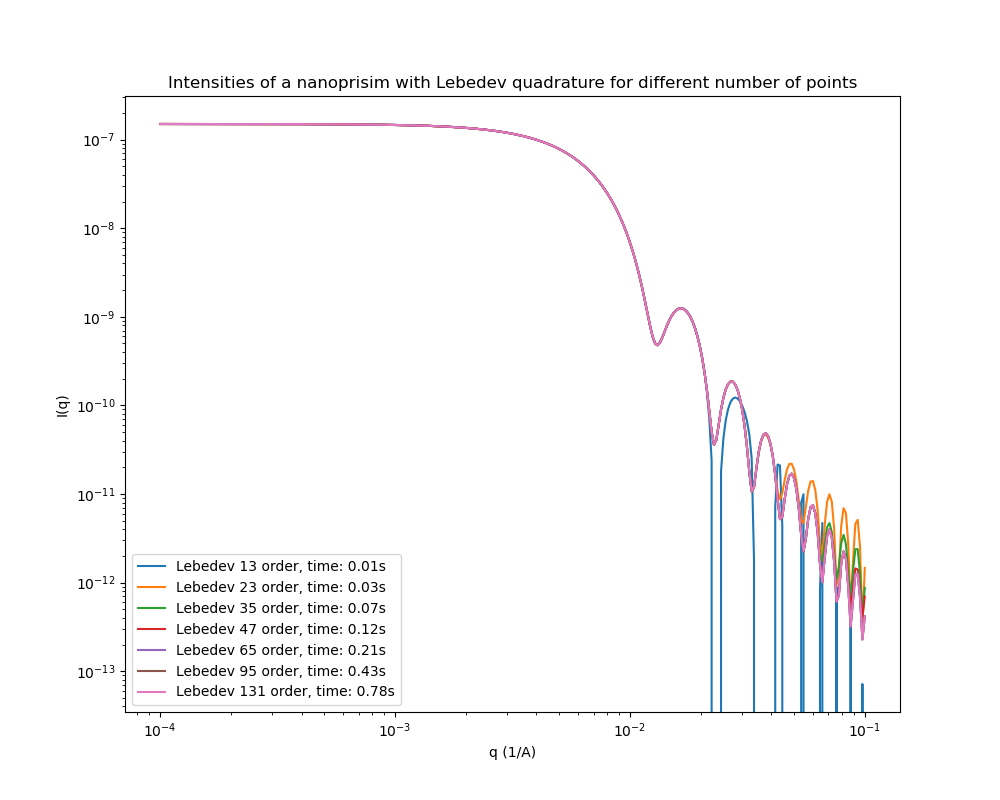

In [10]:
# apply the factor
from matplotlib import pyplot as plt

qs = np.logspace(-4,-1,300,base=10)

# apply the factor
from matplotlib import pyplot as plt

qs = np.logspace(-4,-1,300,base=10)


orderlist=[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 35, 41, 47, 53, 59, 65, 71, 77, 83, 89, 95, 101, 107, 113, 119, 125, 131]
# Pick different number of orders
norder_lebedev_1 = 5 
norder_lebedev_10 = 10
norder_lebedev_15 = 15
norder_lebedev_17 = 17
norder_lebedev_20 = 20
norder_lebedev_25 = 25
norder_lebedev_31= 31 # order for lebedev = 131
order_polygone_1 = orderlist[norder_lebedev_1]
order_polygone_10 = orderlist[norder_lebedev_10]
order_polygone_15 = orderlist[norder_lebedev_15]
order_polygone_17 = orderlist[norder_lebedev_17]
order_polygone_20 = orderlist[norder_lebedev_20]
order_polygone_25 = orderlist[norder_lebedev_25]
order_polygone_31 = orderlist[norder_lebedev_31]


# Define Iq, computational time and the number of total points 
time_start = time.time()
I_q_lebedev_1 = Iq_lebedev(qs, sld, sld_solvent,length_a, b2a_ratio, c2a_ratio, t,  norder_lebedev_1)
time_lebedev_1 = time.time() - time_start

time_start = time.time()
I_q_lebedev_2 = Iq_lebedev(qs, sld, sld_solvent,length_a, b2a_ratio, c2a_ratio, t,  norder_lebedev_10) 
time_lebedev_2 = time.time() - time_start

time_start = time.time()
I_q_lebedev_3 =  Iq_lebedev(qs, sld, sld_solvent,length_a, b2a_ratio, c2a_ratio, t,  norder_lebedev_15)
time_lebedev_3 = time.time() - time_start

time_start = time.time()
I_q_lebedev_4 =  Iq_lebedev(qs, sld, sld_solvent,length_a, b2a_ratio, c2a_ratio, t,  norder_lebedev_17)
time_lebedev_4 = time.time() - time_start

time_start = time.time()
I_q_lebedev_5 =  Iq_lebedev(qs, sld, sld_solvent,length_a, b2a_ratio, c2a_ratio, t,  norder_lebedev_20)
time_lebedev_5 = time.time() - time_start

time_start = time.time()
I_q_lebedev_6 =  Iq_lebedev(qs, sld, sld_solvent,length_a, b2a_ratio, c2a_ratio, t,  norder_lebedev_25)
time_lebedev_6 = time.time() - time_start

time_start = time.time()
I_q_lebedev_7 =  Iq_lebedev(qs, sld, sld_solvent,length_a, b2a_ratio, c2a_ratio, t,  norder_lebedev_31)
time_lebedev_7 = time.time() - time_start


# Plot the results

plt.figure(figsize=(10, 8))
plt.size=(10,6)

plt.loglog(qs,I_q_lebedev_1, label=f'Lebedev {order_polygone_1} order, time: {time_lebedev_1:.2f}s' )
plt.loglog(qs,I_q_lebedev_2, label=f'Lebedev {order_polygone_10} order, time: {time_lebedev_2:.2f}s' )
plt.loglog(qs,I_q_lebedev_3, label=f'Lebedev {order_polygone_15} order, time: {time_lebedev_3:.2f}s' )
plt.loglog(qs,I_q_lebedev_4, label=f'Lebedev {order_polygone_17} order, time: {time_lebedev_4:.2f}s' )
plt.loglog(qs,I_q_lebedev_5, label=f'Lebedev {order_polygone_20} order, time: {time_lebedev_5:.2f}s' )
plt.loglog(qs,I_q_lebedev_6, label=f'Lebedev {order_polygone_25} order, time: {time_lebedev_6:.2f}s' )
plt.loglog(qs,I_q_lebedev_7, label=f'Lebedev {order_polygone_31} order, time: {time_lebedev_7:.2f}s' )

plt.xlabel('q (1/A)')
plt.ylabel('I(q)')
plt.title('Intensities of a nanoprisim with Lebedev quadrature for different number of points')
plt.legend()

Order 53 seems enough.

#### Gauss-legendre

Execution time Gauss with 100 points: 0.0155 seconds
Execution time Gauss with 2500 points: 0.3587 seconds
Execution time Gauss with 10000 points: 1.2569 seconds
Execution time Gauss with 22500 points: 2.7400 seconds
Execution time Gauss with 40000 points: 5.0941 seconds
Execution time Gauss with 250000 points: 37.2216 seconds


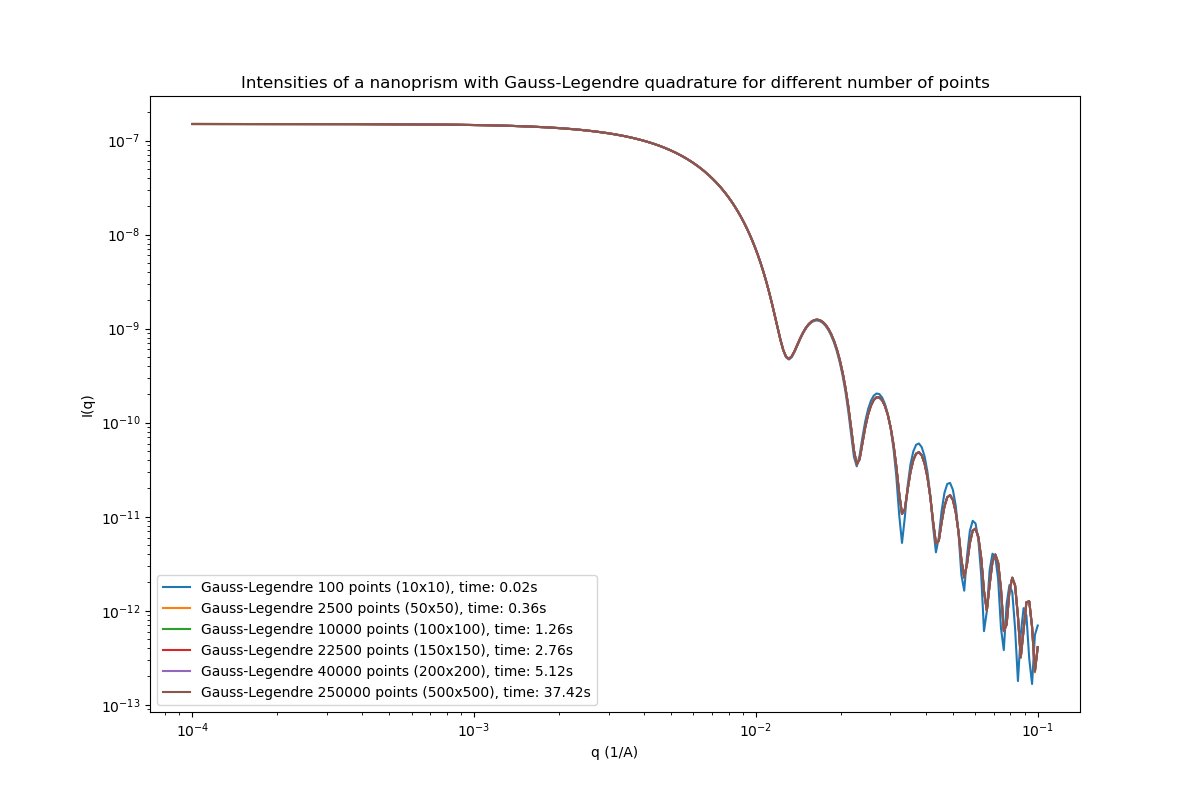

In [11]:
# apply the factor
from matplotlib import pyplot as plt

qs = np.logspace(-4,-1,300,base=10)


# Choose different number of points for gauss-legendre
npoints_gauss_legendre_10 = 10 # number of points per angles (n_total = npoints_gauss_legendre**2) for gauss-legendre
npoints_gauss_legendre_50 = 50 
npoints_gauss_legendre_100 = 100 
npoints_gauss_legendre_150 = 150 
npoints_gauss_legendre_200 = 200 
npoints_gauss_legendre_500 = 500 


# Define Iq, computational time and the number of total points for Gauss-Legendre
time_start = time.time()
I_q_gauss_legendre_10 = Iq_gauss_legendre(qs, sld, sld_solvent, length_a, b2a_ratio, c2a_ratio, t, npoints_gauss_legendre_10)
time_gauss_legendre_10 = time.time() - time_start

time_start = time.time()
I_q_gauss_legendre_50 = Iq_gauss_legendre(qs, sld, sld_solvent, length_a, b2a_ratio, c2a_ratio, t, npoints_gauss_legendre_50)
time_gauss_legendre_50 = time.time() - time_start

time_start = time.time()
I_q_gauss_legendre_100 = Iq_gauss_legendre(qs, sld, sld_solvent, length_a, b2a_ratio, c2a_ratio, t, npoints_gauss_legendre_100)
time_gauss_legendre_100 = time.time() - time_start

time_start = time.time()
I_q_gauss_legendre_150 = Iq_gauss_legendre(qs, sld, sld_solvent, length_a, b2a_ratio, c2a_ratio, t, npoints_gauss_legendre_150)
time_gauss_legendre_150 = time.time() - time_start

time_start = time.time()
I_q_gauss_legendre_200 = Iq_gauss_legendre(qs, sld, sld_solvent, length_a, b2a_ratio, c2a_ratio, t, npoints_gauss_legendre_200)
time_gauss_legendre_200 = time.time() - time_start

time_start = time.time()
I_q_gauss_legendre_500 = Iq_gauss_legendre(qs, sld, sld_solvent, length_a, b2a_ratio, c2a_ratio, t, npoints_gauss_legendre_500)
time_gauss_legendre_500 = time.time() - time_start


# Plot the results

plt.figure(figsize=(12, 8))
plt.size=(10,10)
plt.loglog(qs, I_q_gauss_legendre_10,  label=f'Gauss-Legendre {npoints_gauss_legendre_10**2} points ({npoints_gauss_legendre_10}x{npoints_gauss_legendre_10}), time: {time_gauss_legendre_10:.2f}s')
plt.loglog(qs, I_q_gauss_legendre_50,  label=f'Gauss-Legendre {npoints_gauss_legendre_50**2} points ({npoints_gauss_legendre_50}x{npoints_gauss_legendre_50}), time: {time_gauss_legendre_50:.2f}s')
plt.loglog(qs, I_q_gauss_legendre_100, label=f'Gauss-Legendre {npoints_gauss_legendre_100**2} points ({npoints_gauss_legendre_100}x{npoints_gauss_legendre_100}), time: {time_gauss_legendre_100:.2f}s')
plt.loglog(qs, I_q_gauss_legendre_150, label=f'Gauss-Legendre {npoints_gauss_legendre_150**2} points ({npoints_gauss_legendre_150}x{npoints_gauss_legendre_150}), time: {time_gauss_legendre_150:.2f}s')
plt.loglog(qs, I_q_gauss_legendre_200, label=f'Gauss-Legendre {npoints_gauss_legendre_200**2} points ({npoints_gauss_legendre_200}x{npoints_gauss_legendre_200}), time: {time_gauss_legendre_200:.2f}s')
plt.loglog(qs, I_q_gauss_legendre_500, label=f'Gauss-Legendre {npoints_gauss_legendre_500**2} points ({npoints_gauss_legendre_500}x{npoints_gauss_legendre_500}), time: {time_gauss_legendre_500:.2f}s')

plt.xlabel('q (1/A)')
plt.ylabel('I(q)')
plt.title('Intensities of a nanoprism with Gauss-Legendre quadrature for different number of points')
plt.legend()

2500 total points seems enough (50 per angle).

### 2.2 Final comparison : computional time of each models for a similar intensity

Execution time Lebedev with 974 points: 0.1905 seconds
Execution time Fibonacci with 300 points: 0.0282 seconds
Execution time Gauss with 2500 points: 0.3491 seconds


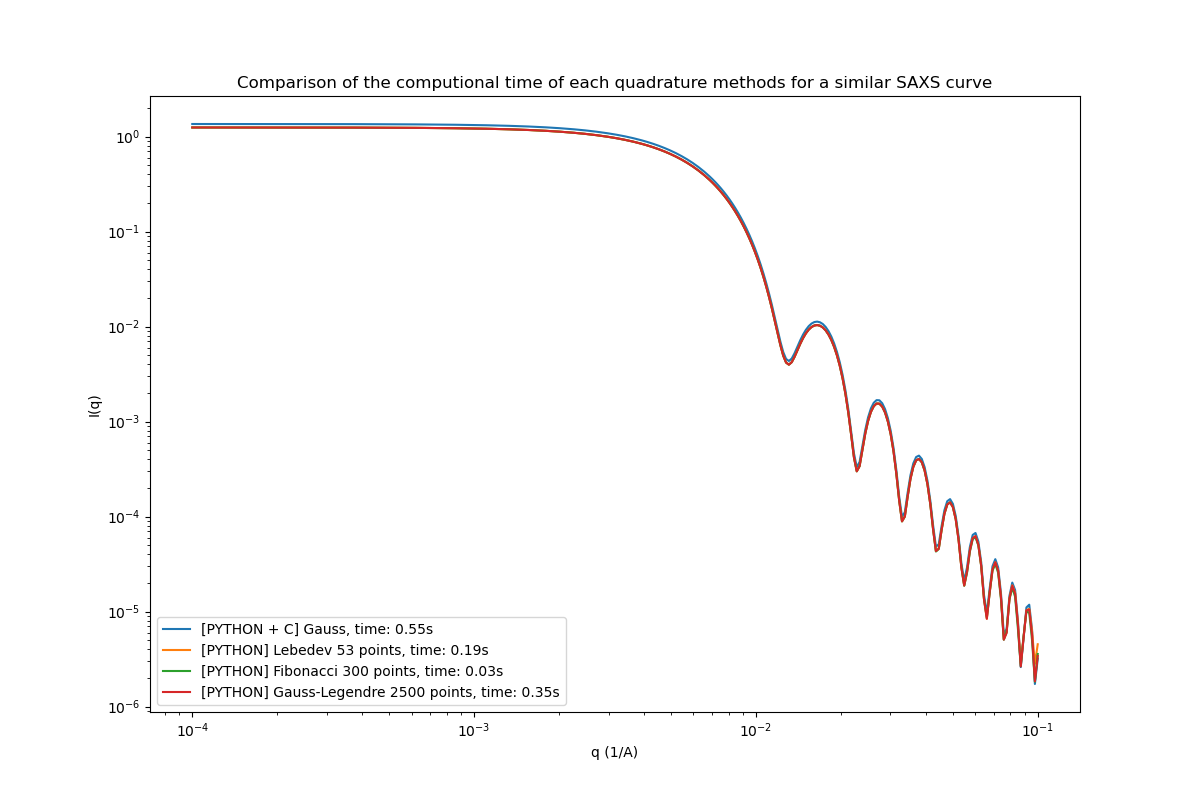

In [12]:
# apply the factor
from matplotlib import pyplot as plt

qs = np.logspace(-4,-1,300,base=10)

# Choose different number of points for each methods (here to  the number of points that seem to converge)
norder_lebedev = 18 # index for convergence
npoints_fibonacci = 300 # number of total points for convergence
npoints_gauss_legendre= 50 # number of points per angles (n_total = npoints_gauss_legendre**2) for gauss-legendre

# Define the parameters of the octahedron
length_a=500
b2a_ratio=1
c2a_ratio=1
t=0.99
sld=4e-6
sld_solvent=1e-6


#  Pure Python: define Iq, computational times and total number of points for each quadrature methods and number of points 
time_start = time.time()
I_q_lebedev = Iq_lebedev(qs, sld, sld_solvent,length_a, b2a_ratio, c2a_ratio, t,  norder_lebedev)
time_lebedev = time.time() - time_start
orderlist=[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 35, 41, 47, 53, 59, 65, 71, 77, 83, 89, 95, 101, 107, 113, 119, 125, 131]
order = orderlist[norder_lebedev]

time_start = time.time()
I_q_fibonacci = Iq_fibonacci(qs, sld, sld_solvent,length_a, b2a_ratio, c2a_ratio, t,  npoints_fibonacci)
time_fibonacci = time.time() - time_start
total_points_fibonacci = npoints_fibonacci

time_start = time.time()
I_q_gauss_legendre = Iq_gauss_legendre(qs, sld, sld_solvent,length_a, b2a_ratio, c2a_ratio, t, npoints_gauss_legendre)
time_gauss_legendre = time.time() - time_start
total_points_gauss_legendre = npoints_gauss_legendre**2



# Code with C 
time_start = time.time()
data = sasmodels.data.empty_data1D(qs)
#  create the computation `kernel` selecting the model
# use DirectModel for computationcomputing theory without fiting
kernel = sasmodels.core.load_model("octahedron_truncated")
call_kernel = sasmodels.direct_model.DirectModel(data, model=kernel)
kernel.info.parameters.defaults
params = {
    "background": 0,
    "scale": 1,
    "length_a": length_a,
    "t": t,
    "length_a_pd_type": 'gaussian', #type of polydispersity function
    "length_a_pd": 0.006, #polydispersity
    "length_a_pd_n": 20, #number of steps in polydispersity
    "length_a_pd_nsigma": 3, #range as multiple of sigma

}
# Call the function of the model
Iq = call_kernel(**params)
time_C = time.time() - time_start



# Plot the results
plt.figure(figsize=(12, 8))
plt.size=(20,30)
plt.loglog(data.x, Iq/V, label = f'[PYTHON + C] Gauss, time: {time_C:.2f}s')
plt.loglog(qs,I_q_lebedev*V*0.05 ,label=f'[PYTHON] Lebedev {order} points, time: {time_lebedev:.2f}s' )
plt.loglog(qs,I_q_fibonacci*V*0.05, label=f'[PYTHON] Fibonacci {total_points_fibonacci} points, time: {time_fibonacci:.2f}s' )
plt.loglog(qs,I_q_gauss_legendre*V*0.05, label=f'[PYTHON] Gauss-Legendre {total_points_gauss_legendre} points, time: {time_gauss_legendre:.2f}s' )

plt.xlabel('q (1/A)')
plt.ylabel('I(q)')
plt.title('Comparison of the computional time of each quadrature methods for a similar SAXS curve')
plt.legend()